<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده علوم ریاضی
            </font>
			<p></p>
			<font color=blue>
الگوریتم‌های علوم داده
            </font>
			<br />
			<br />
بهار ۱۴۰۲
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
مینی‌پروژه‌ی ۵
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#knn">
                        K-nearest neighbors algorithm
                    </a>
				</li>
                <li>
					<a href="#dt">
                       Decision Tree
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<p></p>
<br />
<div id="knn" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
K-nearest neighbors algorithm
        </font>
		<p></p>
		<hr>
در این بخش به پیاده‌سازی الگوریتم knn می‌پردازیم.
<br/>
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
            ابتدا کتابخانه‌های مورد نیاز را import می‌کنیم.
        <br/>
	</font>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#finding the most common element in a list
def most_common(lst):
    return max(set(lst), key=lst.count)

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
            تابع زیر را به نحوی کامل کنید که فاصله‌ی اقلیدسی بین دو نقطه‌ی point و data را بیابد.
        <br/>
	</font>
</div>

In [3]:
def euclidean(point, data):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data) ** 2, axis=1))
    # ***************************************************
    raise NotImplementedError

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
            کلاس زیر را به نحو زیر پیاده‌سازی و کامل کنید:
        <p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>
            در تابع predict
            به ازای هر نقطه در X_test فاصله‌ی آن را با همه‌ی نقاط موجود در X_train به دست آورید و سپس فاصله‌های به دست آمده را از کوچک به بزرگ مرتب کنید. سپس برچسب با بیشترین تکرار از میان kتای اول لیستِ فاصله‌ها را برای آن نقطه انتخاب کنید. در نهایت باید یک لیست از پیشبینی‌هایی که به روش knn برای هر یک از داده‌های تست کردید در خروجی return کنید. در صورت تمایل می‌توانید از تابع most_common که عنصر با بیشترین تکرار را برمی‌گرداند استفاده کنید. توجه شود که X_test مجموعه‌ای نقاط تست است و لزوما یک نقطه نیست. 
        </li>
        <li>
            در تابع evaluate با فراخوانی تابع predict برای داده‌های تست برچسب تعیین کنید و در نهایت دقت مدل را محاسبه کنید و return کنید.
        </li>
    </ul>
</p>
	</font>
</div>
        </li>
<br/>
	</font>
</div>

In [4]:
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: Predict the class of each point in X_test using knn algorithm
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))
        # ***************************************************
        raise NotImplementedError

    def evaluate(self, X_test, y_test):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: Predict the class of each point in X_test by calling predict function and then find the accuracy
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy
        # ***************************************************
        raise NotImplementedError

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
            در این قسمت عملکرد الگوریتم knn را به ازای kهای از 1 تا 30 بر روی مجموعه داده‌ی iris مشاهده می‌کنید.
        <br/>
	</font>
</div>

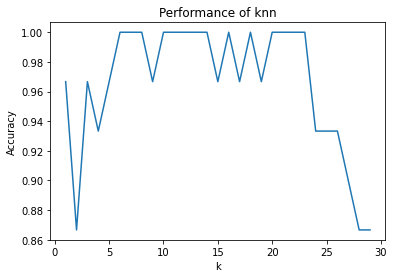

In [5]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# Preprocess data
ss = StandardScaler().fit(X_train)
X_train, X_test = ss.transform(X_train), ss.transform(X_test)# Test knn model across varying ks
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

<p></p>
<br />
<div id="dt" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
Decision Tree
        </font>
		<p></p>
		<hr>
			در این بخش با درخت تصمیم آشنا می‌شویم. قصد داريم تا به كمك تابع  DecisionTreeClassifier از كتابخانه  sklearn پايتون، يك طبقه‌بند بسازيم. مي‌خواهيم براي پيدا كردن پارامترهاي بهينه براي اين طبقه‌بند از روش  grid search استفاده كنيم. بدين منظور مي‌توانيد از GridSearchCV از كتابخانه sklearn استفاده كنيد. پارامترهاي مورد بررسي براي درخت تصميم در اين سوال به شرح زير هستند:
			<li>
				criterion که می‌تواند entropy یا gini باشد.
			</li>
			<li>
				max_depth
			</li>
			<li>
				min_samples_split
			</li>
			<li>
				max_leaf_nodes
			</li>
<br/>
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
            ابتدا کتابخانه‌های مورد نیاز را import می‌کنیم. در صورتی که کتابخانه‌ی seaborn را نصب نکرده‌اید با دستور زیر آن را نصب کنید.
        <br/>
	</font>
</div>

In [ ]:
%pip install seaborn

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
			در این قسمت مجموعه داده‌ی iris را import می‌کنیم و سپس آن را به دو بخش آموزش و آزمون تقسیم می‌کنیم.
		<br/>
	</font>
</div>

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
            ابتدا کتابخانه‌های مورد نیاز را import می‌کنیم. در صورتی که کتابخانه‌ی seaborn را نصب نکرده‌اید با دستور زیر آن را نصب کنید.
        <br/>
	</font>
</div>

In [10]:
#set parametrs for gridsearch
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth' :  list(range(1,11)),'criterion' :['gini', 'entropy']}
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: make a Decision Tree Classifier object using DecisionTreeClassifier() function
clf = DecisionTreeClassifier()
# TODO: make a Grid Search object using GridSearchCV() passing following arguments to it (estimator = clf,  param_grid = params, cv = 5, verbose = 1)
GS = GridSearchCV(estimator = clf,  param_grid = params, cv = 5, verbose = 1)
# TODO: call the Grid Search method fit() passing X_train and y_train as arguments
GS.fit(X_train, y_train)
# ***************************************************

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [11]:
#printing the results of gridsearch
print('Best Criterion:', GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', GS.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:', GS.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min_samples_split:', GS.best_estimator_.get_params()['min_samples_split'])

best_model = GS.best_estimator_
best_model

Best Criterion: gini
Best max_depth: 4
Best max_leaf_nodes: 5
Best min_samples_split: 2


DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5)

In [12]:
# makeprediction usin best model founded by gridsearch
best_model.fit(X_train, y_train)
y_predict = best_model.predict(X_test)
print('Accuracy of DecisionTreeClassifier is: {:.2f}'.format(accuracy_score(y_test, y_predict)*100),'%') 

Accuracy of DecisionTreeClassifier is: 97.78 %
